In [131]:
import glob
import os
import re
import pickle
from io import StringIO
from collections import defaultdict

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

import torch
from scipy.spatial import distance
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA


%matplotlib inline

In [173]:
input_lines = []
with open('model_data/data/all_data2.csv') as f:
    for line in f:
        input_lines.append(line)
           
len(input_lines)

476

In [174]:
os.listdir("model_data/data")

['sklearn_labels.csv',
 'all_data_model.dbow_numnoisewords.2_vecdim.100_batchsize.32_lr.0.001000_epoch.95_loss.0.755801.csv',
 'caret.csv',
 'numpy_labels.csv',
 'numpy.csv',
 'all_labels.csv',
 'all_data2.csv',
 'sklearn.csv',
 'all_data.csv',
 'scipy_labels.csv',
 'scipy.csv',
 'caret_labels.csv',
 'all_data2_model.dbow_numnoisewords.2_vecdim.100_batchsize.32_lr.0.001000_epoch.95_loss.0.6850212.csv',
 'all_data_model.dbow_numnoisewords.2_vecdim.100_batchsize.32_lr.0.001000_epoch.99_loss.0.6853602.csv',
 'all_data_model.dbow_numnoisewords.2_vecdim.100_batchsize.32_lr.0.001000_epoch.97_loss.0.750086.csv']

In [175]:
output_lines = []
with open('model_data/data/all_data2_model.dbow_numnoisewords.2_vecdim.100_batchsize.32_lr.0.001000_epoch.95_loss.0.6850212.csv') as f:
    for line in f:
        output_lines.append(line)
    
len(output_lines)

476

In [176]:
matched = []
for line_idx in range(len(output_lines)):
    matched.append((input_lines[line_idx], output_lines[line_idx]))

matched_no_header = matched[1:]
    
matched_clean_idxs = [re.match(".*[A-Z].*", x[1]) is None for x in matched_no_header]
matched_clean = [x for x in matched_no_header if not re.match(".*[A-Z].*", x[1])]
matched_clean_vectors = [x[1].split(",") for x in matched_clean]

vec_matrix = np.array(matched_clean_vectors)
vec_matrix.shape

(461, 100)

In [177]:
def topNMatches(idx, matrix, n=5):
    
    distances = distance.cdist([matrix[idx]], matrix, "cosine")[0]

    ind = np.argpartition(distances, n+1)[:(n+1)]
    sorted_ind = ind[np.argsort(distances[ind])][1:]
    min_distances = distances[sorted_ind]
    max_similarity = [1 - x for x in min_distances]
    
    return (max_similarity, sorted_ind)

In [178]:
similarity, idxs = topNMatches(5, vec_matrix)

In [179]:
idxs

array([117, 114,  85, 328, 105])

In [180]:
target = matched[5]
matches = [matched[i] for i in idxs]

100

In [185]:
rankings = defaultdict(list)
for idx in range(vec_matrix.shape[0]):
    rankings[idx] = list(topNMatches(idx, vec_matrix, n=5))

In [186]:
with open('vector_recommendations.pkl', 'wb') as f:
    pickle.dump(rankings, f)

In [191]:
rankings[8]

[[0.67439562825821,
  0.6737601544244304,
  0.6719078491473625,
  0.6682759849569109,
  0.6626707744505367],
 array([390, 385, 387, 162, 388])]

## tsne

<ipython-input-85-ad41dcf565ed>:11: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



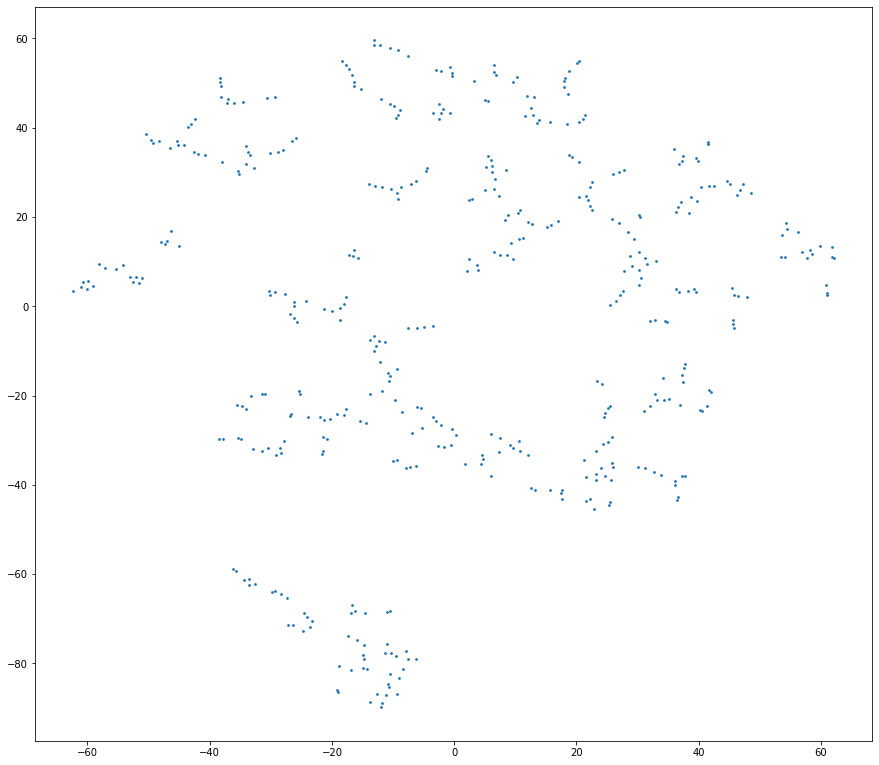

In [85]:
doc_pca = PCA(n_components=5).fit_transform(vec_matrix)
tsne = TSNE(n_components=2, perplexity=5).fit_transform(doc_pca)


fig, ax = plt.subplots()
ax.scatter(tsne[:,0], tsne[:,1],s=3)
# for x, y, token in zip(tsne[:,0],tsne[:,1],mft):
#     ax.annotate(token, xy=(x,y), size=10)

fig.set_size_inches(15,13.5)
fig.show()



In [86]:
import plotly.express as px

In [87]:
tsne_df = pd.DataFrame(tsne, columns=['x', 'y'])

In [88]:


fig2 = px.scatter(tsne_df, x="x", y="y",
#                  size="population", color="continent", hover_name="country",
                  size_max=60)

In [89]:
fig2

In [99]:
name_lookup = [(x[0].strip('"').split("_")[0], languages.get(x[0].strip('"').split("_")[0])) for x in matched_clean[1:]]

In [144]:
lineList = []
with open('model_data/data/all_labels.csv') as f:
    for line in f:
        lineList.append(line.strip().split("|"))

In [250]:
labels = pd.DataFrame(
    lineList[1:], 
    columns=['Package', 'Language', 'Section_ID' ,'Section', 'SectionLink', 'Page_Name']
).iloc[matched_clean_idxs].reset_index()

In [248]:
base_links = {
    'scipy': "https://docs.scipy.org/doc/scipy/reference/tutorial/",
    'caret': "https://topepo.github.io/caret/",
    'numpy': 'https://numpy.org/doc/stable/user/quickstart.html',
    'sklearn': "https://scikit-learn.org/stable/"
}

In [324]:
labels['PageName'] = labels.apply(
    lambda x: "{} - {}, {}".format(
        x.Package,
        " ".join(x.SectionLink.strip(".html").split('-')).title(),
        x.Page_Name
    ),
    axis=1
)

In [334]:
labels.loc[labels.Package == 'sklearn']

,index,Package,Language,Section_ID,Section,SectionLink,Page_Name,Link,PageName
150,163,sklearn,Python,sklearn_1_10_decision_trees,1.10. Decision Trees,modules/tree.html,1.10.1. Classification DecisionTreeClassifier,https://scikit-learn.org/stable/modules/tree.html,"sklearn - Odules/Tree, 1.10.1. Classification ..."
151,164,sklearn,Python,sklearn_1_10_decision_trees,1.10. Decision Trees,modules/tree.html,1.10.2. Regression Decision,https://scikit-learn.org/stable/modules/tree.html,"sklearn - Odules/Tree, 1.10.2. Regression Dec..."
152,165,sklearn,Python,sklearn_1_10_decision_trees,1.10. Decision Trees,modules/tree.html,1.10.3. Multi-output,https://scikit-learn.org/stable/modules/tree.html,"sklearn - Odules/Tree, 1.10.3. Multi-output"
153,166,sklearn,Python,sklearn_1_10_decision_trees,1.10. Decision Trees,modules/tree.html,1.10.4. Complexity In,https://scikit-learn.org/stable/modules/tree.html,"sklearn - Odules/Tree, 1.10.4. Complexity In"
154,167,sklearn,Python,sklearn_1_10_decision_trees,1.10. Decision Trees,modules/tree.html,1.10.5. Tips,https://scikit-learn.org/stable/modules/tree.html,"sklearn - Odules/Tree, 1.10.5. Tips"
...,...,...,...,...,...,...,...,...,...
386,400,sklearn,Python,sklearn_8_2_computational_performance,8.2. Computational Performance,modules/computing.html#computational-performance,8.2. Computational Performance,https://scikit-learn.org/stable/modules/comput...,sklearn - Odules/Computing.Html#Computational ...
387,401,sklearn,Python,sklearn_8_2_computational_performance,8.2. Computational Performance,modules/computing.html#computational-performance,8.3. Parallelism,https://scikit-learn.org/stable/modules/comput...,sklearn - Odules/Computing.Html#Computational ...
388,402,sklearn,Python,sklearn_8_3_parallelism_resource_management_an...,"8.3. Parallelism, resource management, and con...",modules/computing.html#parallelism-resource-ma...,8.1. Strategies,https://scikit-learn.org/stable/modules/comput...,sklearn - Odules/Computing.Html#Parallelism Re...
389,403,sklearn,Python,sklearn_8_3_parallelism_resource_management_an...,"8.3. Parallelism, resource management, and con...",modules/computing.html#parallelism-resource-ma...,8.2. Computational Performance,https://scikit-learn.org/stable/modules/comput...,sklearn - Odules/Computing.Html#Parallelism Re...


In [326]:
labels['Link'] = labels.apply(lambda x: base_links.get(x.Package) + x.SectionLink,axis=1)

In [327]:
ranking_df = pd.DataFrame(rankings).T
ranking_df.columns = ['Rec_Probs', 'Rec_Index']

In [328]:
combined = labels.join(ranking_df).drop(columns="index")


In [329]:
combined

,Package,Language,Section_ID,Section,SectionLink,Page_Name,Link,PageName,Rec_Probs,Rec_Index
0,caret,R,caret_11_subsampling_for_class_imbalances,11 Subsampling For Class Imbalances,subsampling-for-class-imbalances.html,11.1 Subsampling Techniques To,https://topepo.github.io/caret/subsampling-for...,"caret - Subsampling For Class Imbalances, 11.1...","[0.6759168026284725, 0.6503327111025291, 0.638...","[244, 4, 163, 375, 56]"
1,caret,R,caret_11_subsampling_for_class_imbalances,11 Subsampling For Class Imbalances,subsampling-for-class-imbalances.html,11.3 Complications The,https://topepo.github.io/caret/subsampling-for...,"caret - Subsampling For Class Imbalances, 11.3...","[0.6155791831060012, 0.6137299220946123, 0.607...","[292, 67, 233, 8, 391]"
2,caret,R,caret_11_subsampling_for_class_imbalances,11 Subsampling For Class Imbalances,subsampling-for-class-imbalances.html,11.4 Using Custom Subsampling,https://topepo.github.io/caret/subsampling-for...,"caret - Subsampling For Class Imbalances, 11.4...","[0.5818995670866465, 0.581233463769919, 0.5771...","[216, 32, 11, 151, 8]"
3,caret,R,caret_12_using_recipes_with_train,12 Using Recipes with train,using-recipes-with-train.html,12.1 Why Should,https://topepo.github.io/caret/using-recipes-w...,"caret - Using Recipes With Train, 12.1 Why Should","[0.6327495350333942, 0.6193120877616372, 0.617...","[272, 77, 385, 4, 298]"
4,caret,R,caret_12_using_recipes_with_train,12 Using Recipes with train,using-recipes-with-train.html,12.2 An Example The QSARdata,https://topepo.github.io/caret/using-recipes-w...,"caret - Using Recipes With Train, 12.2 An Exam...","[0.7013757694326713, 0.7004095972967935, 0.681...","[387, 385, 390, 384, 366]"
...,...,...,...,...,...,...,...,...,...,...
456,scipy,Python,scipy_statistics_scipy_stats,Statistics (scipy.stats),stats.html,Building specific distributions,https://docs.scipy.org/doc/scipy/reference/tut...,"scipy - Stats, Building specific distributions","[0.6381339001314704, 0.6364477798297543, 0.634...","[366, 361, 460, 455, 385]"
457,scipy,Python,scipy_statistics_scipy_stats,Statistics (scipy.stats),stats.html,Comparing two samples,https://docs.scipy.org/doc/scipy/reference/tut...,"scipy - Stats, Comparing two samples","[0.6312074607746629, 0.6109502254042097, 0.604...","[449, 399, 411, 174, 46]"
458,scipy,Python,scipy_statistics_scipy_stats,Statistics (scipy.stats),stats.html,Introduction In this,https://docs.scipy.org/doc/scipy/reference/tut...,"scipy - Stats, Introduction In this","[0.607461532520102, 0.5994546764117346, 0.5969...","[67, 460, 414, 444, 434]"
459,scipy,Python,scipy_statistics_scipy_stats,Statistics (scipy.stats),stats.html,Kernel density estimation,https://docs.scipy.org/doc/scipy/reference/tut...,"scipy - Stats, Kernel density estimation","[0.6568073802380295, 0.6562692986010782, 0.656...","[455, 386, 383, 389, 460]"


In [330]:
with open("recommendation_table.pkl", 'wb') as f:
    pickle.dump(combined, f)

In [331]:
with open("recommendation_table.pkl", 'rb') as f:
    table = pickle.load(f)

In [332]:
idx = 5

In [333]:
table.head()

,Package,Language,Section_ID,Section,SectionLink,Page_Name,Link,PageName,Rec_Probs,Rec_Index
0,caret,R,caret_11_subsampling_for_class_imbalances,11 Subsampling For Class Imbalances,subsampling-for-class-imbalances.html,11.1 Subsampling Techniques To,https://topepo.github.io/caret/subsampling-for...,"caret - Subsampling For Class Imbalances, 11.1...","[0.6759168026284725, 0.6503327111025291, 0.638...","[244, 4, 163, 375, 56]"
1,caret,R,caret_11_subsampling_for_class_imbalances,11 Subsampling For Class Imbalances,subsampling-for-class-imbalances.html,11.3 Complications The,https://topepo.github.io/caret/subsampling-for...,"caret - Subsampling For Class Imbalances, 11.3...","[0.6155791831060012, 0.6137299220946123, 0.607...","[292, 67, 233, 8, 391]"
2,caret,R,caret_11_subsampling_for_class_imbalances,11 Subsampling For Class Imbalances,subsampling-for-class-imbalances.html,11.4 Using Custom Subsampling,https://topepo.github.io/caret/subsampling-for...,"caret - Subsampling For Class Imbalances, 11.4...","[0.5818995670866465, 0.581233463769919, 0.5771...","[216, 32, 11, 151, 8]"
3,caret,R,caret_12_using_recipes_with_train,12 Using Recipes with train,using-recipes-with-train.html,12.1 Why Should,https://topepo.github.io/caret/using-recipes-w...,"caret - Using Recipes With Train, 12.1 Why Should","[0.6327495350333942, 0.6193120877616372, 0.617...","[272, 77, 385, 4, 298]"
4,caret,R,caret_12_using_recipes_with_train,12 Using Recipes with train,using-recipes-with-train.html,12.2 An Example The QSARdata,https://topepo.github.io/caret/using-recipes-w...,"caret - Using Recipes With Train, 12.2 An Exam...","[0.7013757694326713, 0.7004095972967935, 0.681...","[387, 385, 390, 384, 366]"


In [279]:
table.loc[table.Page_Name == '11.3 Complications The'].index[0]

1

In [285]:
from decimal import Decimal

In [307]:
["{:.2f}%".format(x * 100) for x in table.iloc[idx].Rec_Probs]

['63.00%', '60.81%', '60.76%', '59.96%', '58.45%']

In [311]:

def processTable(table, idx):
    probs = ["{:.2f}".format(x * 100) for x in table.iloc[idx].Rec_Probs]
    locs = table.iloc[idx].Rec_Index

    cols = [
        'Package', 
        'Language', 
        'Section_ID', 
        'Section', 
        'Link', 
        'Page_Name',   
    ]

    outputTable = (
        table
        .loc[locs, cols]
        .join(pd.DataFrame(probs, index=locs, columns=['Similarity Score']))
    )

    
    return outputTable, outLinks

In [312]:
x, _ = processTable(table, 5)
x

,Package,Language,Section_ID,Section,Link,Page_Name,Similarity Score
117,caret,R,caret_7_train_models_by_tag,7 train Models By Tag,https://topepo.github.io/caret/train-models-by...,7.0.47 Support Vector Machines,63.00
114,caret,R,caret_7_train_models_by_tag,7 train Models By Tag,https://topepo.github.io/caret/train-models-by...,7.0.44 Rule-Based Model,60.81
85,caret,R,caret_7_train_models_by_tag,7 train Models By Tag,https://topepo.github.io/caret/train-models-by...,7.0.18 Kernel Method,60.76
328,sklearn,Python,sklearn_6_3_preprocessing_data,6.3. Preprocessing data,https://scikit-learn.org/stable/modules/prepro...,6.3.6. Imputation,59.96
105,caret,R,caret_7_train_models_by_tag,7 train Models By Tag,https://topepo.github.io/caret/train-models-by...,7.0.36 Radial Basis Function,58.45


In [336]:
import re

import numpy as np
import pandas as pd

from scipy.spatial import distance
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

MODEL_PATH = 'app/all_data2_model.dbow_numnoisewords.2_vecdim.100_batchsize.32_lr.0.001000_epoch.95_loss.0.6850212.csv'


def readDocMatrix(path):
    input_lines = []
    with open('app/all_data2.csv') as f:
        for line in f:
            input_lines.append(line)

    output_lines = []
    with open(path) as f:
        for line in f:
            output_lines.append(line)

    matched = []
    for line_idx in range(len(output_lines)):
        matched.append((input_lines[line_idx], output_lines[line_idx]))
        
    matched_clean = [x for x in matched if not re.match(".*[A-Z].*", x[1])]

    return matched_clean


def toNumpyMatrix(matched):

    matched_clean_vectors = [x[1].split(",") for x in matched[1:]]
    vec_matrix = np.array(matched_clean_vectors)

    return vec_matrix


def topNMatches(idx, matched, n=5):
    
    matrix = toNumpyMatrix(matched)
    distances = distance.cdist([matrix[idx]], matrix, "cosine")[0]

    ind = np.argpartition(distances, n+1)[:(n+1)]
    sorted_ind = ind[np.argsort(distances[ind])][1:]
    min_distances = distances[sorted_ind]
    max_similarity = [1 - x for x in min_distances]
    
    return (max_similarity, sorted_ind)


def tsneMatrix(matched):

    doc_matrix = toNumpyMatrix(matched)
    doc_pca = PCA(n_components=5).fit_transform(doc_matrix)
    tsne = TSNE(n_components=2, perplexity=5).fit_transform(doc_pca)
    
    return tsne

docMatrix = readDocMatrix(MODEL_PATH)
tsne = tsneMatrix(docMatrix)

In [341]:
with open('app/tsne.pkl' ,'wb') as f:
    pickle.dump(tsne, f)